# Introduction to Random Number Generation and Monte Carlo Methods

In this notebook we are going to explore the facinating world of random numbers and one of the most popular computational algorithms that rely on rundom numbers the Monte Carlo methods. This introduction is  designed for students who are already familiar with basic concepts of probabity theory and statistics. 


The main outline is the following: 

* [Random Number Generation](#Random_Number_Generation)

    In this section we will address the following: 
    * [What is a "random number"?](#What_is_rn)
    * [Example of pseudorandom generator](#LCG)
    * [How can we evaluate our pseudorandom generator?](#Spectral)
    * [How our method compares to python numpy random generators?](#CompPy)
    
    
* [A First Glimps to Monte Carlo Methods](#MC_intro)

    Now that we have a taste of how one can generate a pseudo number generator is time to use it: 
    * [Draw random numbers from a probability distribution](#MC_dr) 
    * [Monte Carlo integration](#MC_integr)
    * Calculating pi
    
    
* [Exercises and extra Material](#Ex_Ex)
    
    The only way to digest the concepts discussed above is to "get your hands dirty". As my favorite math teacher in how school was always saying "no one learned how to play the piano by watching a pianist play".


# Necessary imports

In [42]:
from IPython.display import IFrame
from IPython.display import Image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib notebook


<a id='Random_Number_Generation'></a>
# Random Number Generation 


<a id='What_is_rn'></a>
## What is a random  number ??

The outcome that we will get if we toss a perfect coin or roll a set of perfectly balanced dice is what we call a random number. Of course in real life, if we want to create a truly random number we need to search for more precice ways (Vincent,1970) . Physical phenomena like noise in electronics (Holman et al., 1995), or exponential decays have been used to create sequences of truly random numbers.

Random numbers have numerous applications in simulations for various fields of science, engineering and cryptography. But there are other ways to create random numbers: we can create algorithms that will approximate a random number sequence. Such algorithms are called pseudo number generators and we are going to explore them further in the section comming up! 


<a id='LCG'></a>
## Example of  pseudorandom generator

As was discussed in the previous paragrapgh a pseudo random number generator is just an algorithm that is approximating  a sequence of random number. We will strart by taking a look at a very old algorithm : the "Linear congruential generator" (LCG).

This algorithm is generating a squence of random numbers using the recurrence relation: 
$$ x_{n+1} = (a * x_n + b ) mod M $$

Lets think how this function generates numbers in general. We will start by implementing the algoritm: 

In [2]:
def myrnd(N,seed,a,b,M):
    xold = seed
    random_numbers = []
    for i in range(0,N):
        # we implement the relationship above
        xnew = np.fmod(a*xold+b,M)
        xold = xnew
        random_numbers.append(xnew)
    return np.asarray(random_numbers)

We will start by creating a simple example : seed = 13, a=5 , b=3 and M=16 

In [3]:
print(myrnd(20,15,3,5,16))

[ 2 11  6  7 10  3 14 15  2 11  6  7 10  3 14 15  2 11  6  7]


From this example we observe the following : 

1. The numbers in the sequence the are not random 
2. They sequence starts repeating after the  17th digit 

The length of the sequence, before it start to repeat, is called *period* or *cycle length*. We are going to discuss it again later when we will try to determine what are the desired properties of a "good" generator.

Before proceeding to tests is there anything we can say about the choice of the parameters we made in our impementation of the LCG?

I am going to re-implement the sequence so that will return values in the interval (0,1) :

In [4]:
def myrnd(N,seed,a,b,M):
    xold = seed
    random_numbers = []
    for i in range(0,N):
        # we implement the relationship above
        xnew = np.fmod(a*xold+b, M)
        xold = xnew
        # we devide with M to be in the range [0,1]
        random_numbers.append(xnew/M)
    return np.asarray(random_numbers)

**What do you see if you change the value of M ?** Some values are really bad (for the fixed selection of the other parameters while othes are really bad.How should we choose M? There is an extensive explanation in (Knuth,1981) of the theorems and lemas that can provide with the best possible choice for the parameters. I encourage you to go through the text.  For now we are going to try two examples : 

1. a = 137 b=187 and M=256 
2. a = 1664525 M= $2^{31} - 1 $ and b an odd number 

I should clarify that case 2. is optimal for 32 bit systems. To test those cases we are going to look at the distributions of the generated sequences (if they are indeed following U(0,1)). Next we are going to see if points of two sequences are distribuded uniformly in the (x,y) plane. The next function is doing exactly that. As input we provide the number of numbers we want to generate and the parameters a,b and M for the LCG. 

In [5]:
def parameterTest(N,a,b,M) :
    my_seq = np.asarray(myrnd(2*N,0.5,a,b,M), dtype=np.float32) ;
    set_of_x = my_seq[1::2]
    set_of_y = my_seq[::2]
    return set_of_x,set_of_y

In [6]:
def my_plot2D(setofx,setofy):
    df = pd.DataFrame({'x_n':setofx,'y_n':setofy})
    #df.head()
    fig = plt.figure( figsize=(7,3.5))
    ax = fig.add_subplot(121)
    for j,series in enumerate(df.columns[:]):
            alphaVal = 0.6
            linethick = 3.5
            df[series].plot.hist(bins=15,
                label=series,
                histtype='step', 
                stacked=True,
                fill= False,
                ax=ax,
                alpha=alphaVal
                )
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_label_coords(0.5,1.01)
    ax.yaxis.tick_left()
    ax.legend(frameon=False, loc='lower center',ncol=1,handlelength=4)

    ax1 = fig.add_subplot(122)
    df.plot.scatter('x_n','y_n',s = 0.2,ax =ax1)
    #fig.text(.5, .01, 'Figure 1', ha='center')
    # resize the figure to match the aspect ratio of the Axes    
    plt.show()

#### First case 1 : 

<IPython.core.display.Javascript object>


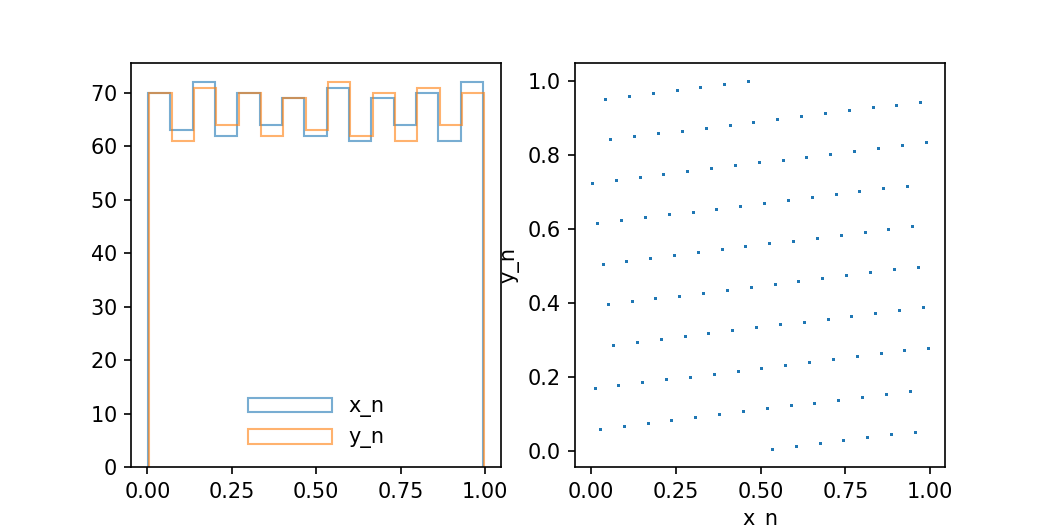

In [7]:
x,y = parameterTest(1000,137,187,256)
my_plot2D(x,y)

By looking at the left plot of the previous figure we can already notice that the generated values span through the range but there is a periodic behaviour . When we look at the right plot we clearly see that the sequences are not so random... Lets try the same for case 2.

#### Next Case 2:

<IPython.core.display.Javascript object>


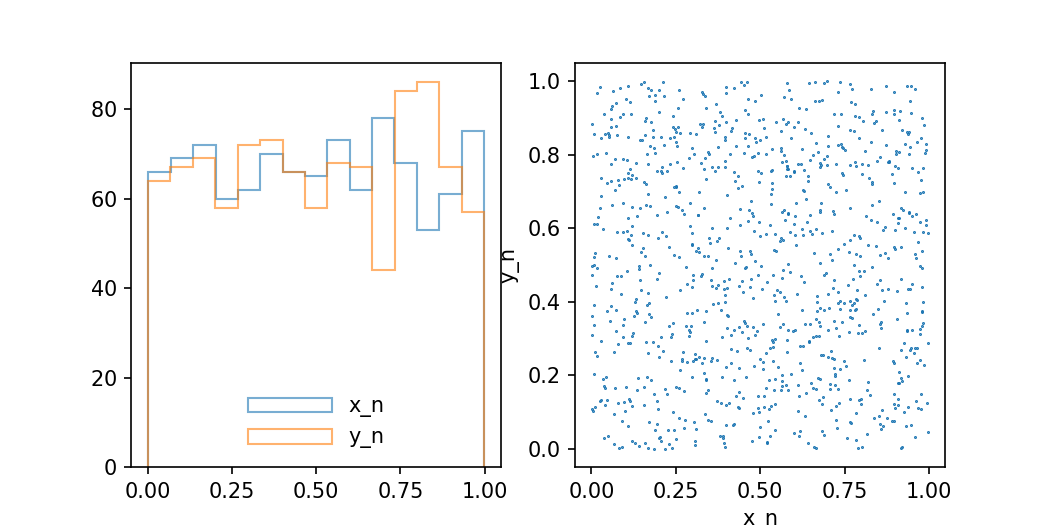

In [8]:
x,y= parameterTest(1000,1664525,163,2**31-1)
my_plot2D(x,y) 

For this case things look better. Can we say now that we are happy with our result ?? Is that enough to say that we can use this generation for our calculations, simulations etc ?

### What are the characteristics we want our generator to have? 

1. Large period.\
   As we saw in the previous section we need to make it so th at the sequence will not start repeating after the 17th digit. The longer the length before the repeatition starts the better :)  
2. The produced numbers should distributed uniformly and be as random as possibe.
3. Be fast: of course it is relative to the computer speed but still it wouldn't be nice to wait for days before having  my sequence :D 



<a id='Spectral'></a>
## How can we evaluate our pseudo random generator? 

Now that we know what are the desired traits of a pseudorandom number generator how can we test the generator?? There are several ways to do that. After we generate our sequence we can go on and perform several statistical tests. We can perform a chi-square test, or use a Kolmogororv-Smirnov test. The test we are going to use here is the so called spectral test. 

Now lets create some sets of the pseudo random rumbers, starting from a **slightly** different seed: <a id='exercise1'></a>


In [9]:
N=10000
a = 1664525
b = 163
M = 2**31-1

set_of_x = np.asarray(myrnd(N,0.5,a,b,M), dtype=np.float32) ;
set_of_y = np.asarray(myrnd(N,1.,a,b,M), dtype=np.float32) ;
set_of_z = np.asarray(myrnd(N,0.1,a,b,M), dtype=np.float32) ;
df = pd.DataFrame({'x_n':set_of_x,'y_n':set_of_y,'z_n':set_of_z})

#print the first rows that we have an overview
df.head()

,x_n,y_n,z_n
0,0.000388,0.000775,0.000078
1,0.217046,0.307750,0.144483
2,0.880589,0.065310,0.532812
3,0.984554,0.054126,0.528896
4,0.587110,0.578637,0.593888


Just by looking the first 20 rows of the sets we create we cannot see any repeated numbers and in general everything appears to be "more random" than what we saw in the previous example. Is this the case though ? Is there a way to determine if our generator is good ?

<IPython.core.display.Javascript object>


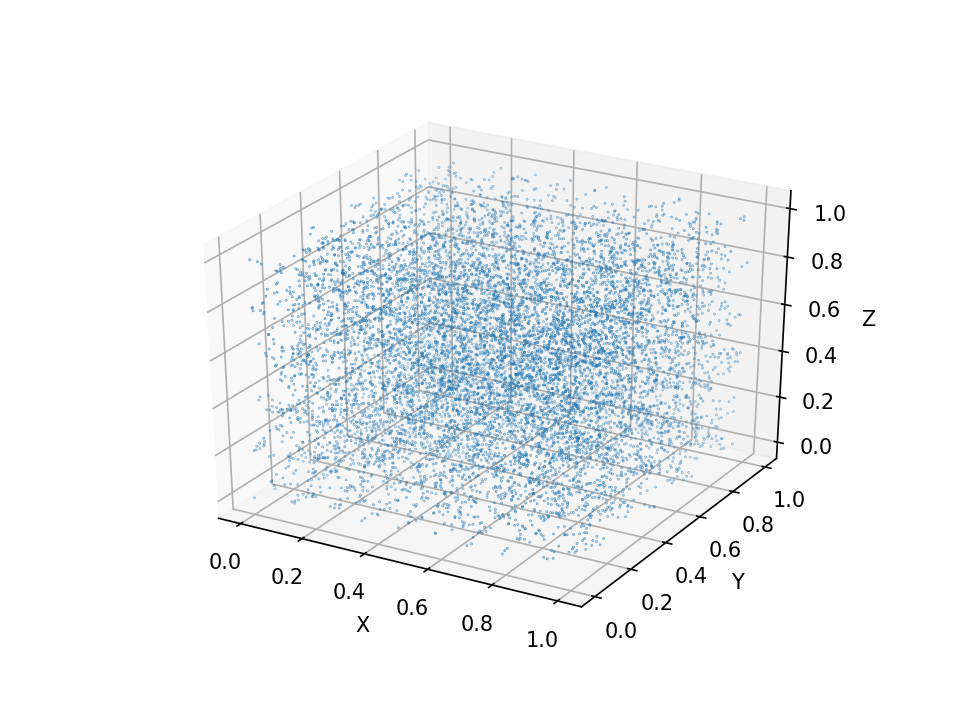

In [10]:
#%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(set_of_x, set_of_y, set_of_z,s=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

The box looks cool but try to rotate it! You will see suddenly planes appearing. This called "Marsaglia effect" (Marsaglia, 1968) and showed that the pseudorandom numbers actually fall in parallel succesive hyperplanes. The distance of the planes depends on the parameters chosen and ideally should be very small.

<a id='CompPy'></a>
## How our method compares to python numpy random generators?

It is now time to test Python's random number generator and specificaly we will go for numpy library random generator.  

<IPython.core.display.Javascript object>


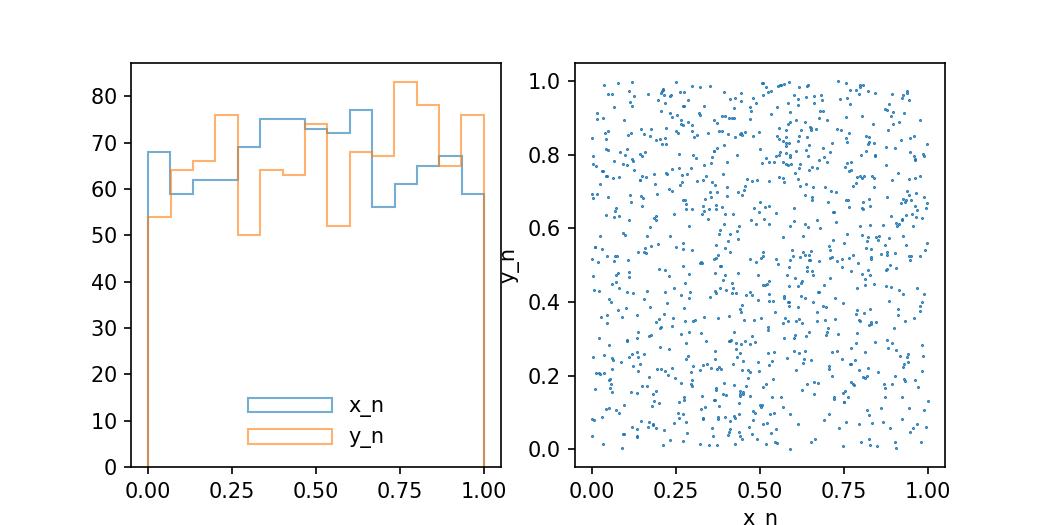

In [11]:
np.random.seed(5)
init_seq = np.random.rand(2000)
my_plot2D(init_seq[::2],init_seq[1::2])

<IPython.core.display.Javascript object>


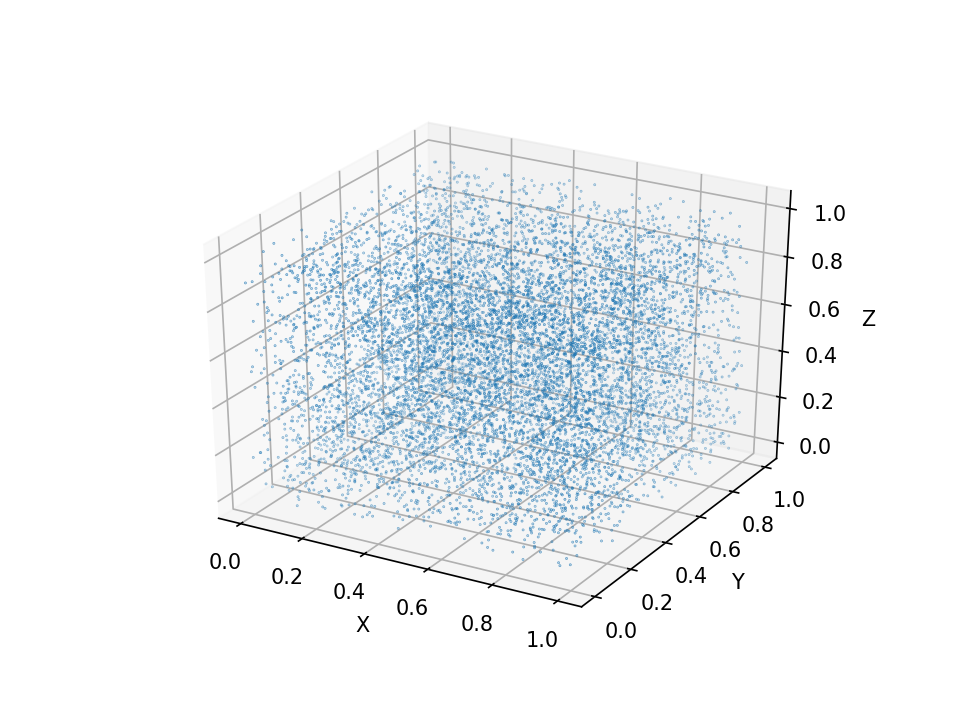

In [12]:
np.random.seed(5)
set_of_x = np.random.rand(10000)
np.random.seed(6)
set_of_y = np.random.rand(10000)
np.random.seed(7)
set_of_z = np.random.rand(10000)
df = pd.DataFrame({'x_n':set_of_x,'y_n':set_of_y,'z_n':set_of_z})

#%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(set_of_x, set_of_y, set_of_z,s=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Take your time and  rotate the plot above: now we don't see the previous effect! Before you declare a winner you should think that this is not the only test we perform! Still for the first application in the next part of the notebook we are going to use this generator. 

<a id='MC_intro'></a>
# A First Glimps to Monte Carlo Methods

What do we mean when we say "Monte Carlo Methods" ??? \
We use this term to describe algorithms that use random sampling to get numerical solutions. They have various applications in big range of fields. 
In this section we are going to discuss how "Monte Carlo" is used to 
1. draw random numbers from a probability distribution (other than uniform)
2. perform numerical integration

<a id='MC_dr'></a>
## Draw random numbers from a probability distribution (other than uniform)

What happens if we want to have a set of random numbers distributed according to a certain propabily?? We are going to discuss two methods: 
1. The transformation method
2. The "hit and miss" method

### Transformation method
The idea here is simple : if we have a set of values uniformly distributed (U(0,1)) we can use the inverse of the cumulative distribution fuction (cdf) to crete a set of values distributed according to the desired pdf. Lets see it with an example : 

We consider a triangular distribution.(Image from [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Triangular_distribution_PMF.png/1024px-Triangular_distribution_PMF.png))
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Triangular_distribution_PMF.png/1024px-Triangular_distribution_PMF.png" data-canonical-src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Triangular_distribution_PMF.png/1024px-Triangular_distribution_PMF.png" width="300" height="500" />
The mathematical expression of this generic triangular distribution for our case were a=0, b=1 we have
$$
f(x|a) = \left\{\begin{array}{lr}
\frac{2x}{a}, &\text{for } 0\leq x\leq a\\
\frac{2(1-x)}{(1-a)}, &\text{for } a\leq x\leq 1
\end{array}\right. 
$$

The cdf of the triangular probability density function is 

$$
F(x|a) = \left\{\begin{array}{lr}
\frac{x^2}{a}, &\text{for } 0\leq x\leq a\\
1- \frac{(1-x)^2}{a(1-a)}, &\text{for } a\leq x\leq 1
\end{array}\right. 
$$

Now we need to inverce the cdf : 
$$
F^{-1}(x|a) = \left\{\begin{array}{lr}
\sqrt{xa}, & 0\leq x\leq a\\
1-\sqrt{(1-x)(1-a)} , & a\leq x\leq 1\\
\end{array}\right. 
$$

Now all we need to do is to use this function to create the disired set of values. 

[0.58168131 0.14548412 0.06116568 ... 0.92269122 0.47754991 0.24623508]


<IPython.core.display.Javascript object>


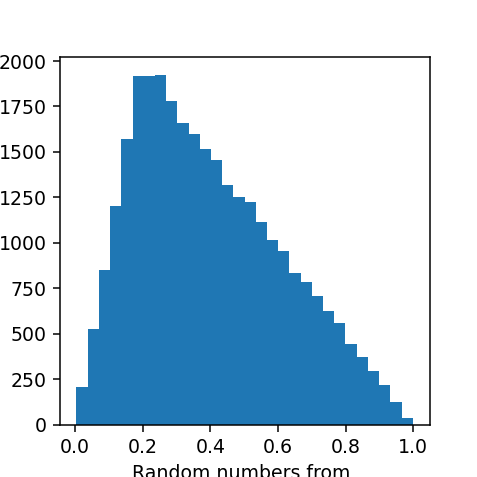

In [49]:
init_seq = np.random.rand(30000)
print(init_seq)
a = np.sqrt((init_seq[ init_seq<0.2])*0.2)
b = 1-np.sqrt((1-init_seq[ init_seq>=0.2])*0.8)
c = np.concatenate((a,b))

fig = plt.figure(figsize=(3.5,3.5))
ax = fig.add_subplot(111)
ax.hist(c,30)
ax.set_xlabel('Random numbers from ')
ax.set_ylabel('')

plt.show()
#print(np.sqrt())


### Hit and miss method
The previous method has a caveat: we are not always able to apply it (Why??) A simpler method is to put the pdf in a rectagle and fill it with random points. All the points bellow the curve are "hit" and all those above them are a miss (we don't keep them ). 

Image from [PyMC 2.3.7rc1 documentation](https://pymc-devs.github.io/pymc/theory.html))
<img src="https://pymc-devs.github.io/pymc/_images/reject.png" data-canonical-src="https://pymc-devs.github.io/pymc/_images/reject.png" width="400" height="600" />

 We this method we can quickly calculate the value of pi:

In [64]:
def calc_pi(N):
    x= np.random.rand(N)
    y = np.random.rand(N)
    my_pi = 4*np.sum(x**2 + y**2 < 1 )/N
    return my_pi
print(calc_pi(10000))

3.1392


<a id='MC_integr'></a>
## Monte Carlo integration (for 1D integrals)

This is  a numerical technique in which  we use random numbers to estimate an integral. Lets consider a function $f(x)$ in some interval $(a,b)$.
To  approximate the integral $$ I=\int_a^b{f(x) dx } $$
we generate a sample of N (pseudo)random numbers which are  uniformly distributed in the desired interval. For each point $x_i$ in the sample,we calculate  $f(x_i)$.  The estimation for the integral I is given by: 
$$<I> = (b-a) \frac{1}{N} \sum_{i=1}^N{f(x_i)}$$     
It can be proven that the expected value of $<I>$ is I. Monte Carlo integration is providing the exact solution in the limit of $N \rightarrow \infty$. The variance of the estimator $<I>$, is proportional to $\frac{1}{\sqrt{N}}$. 


We are going to use the hit and miss method to calculate  the following integral
$$ \int_0^1 f(x)dx = \int_0^1 \cos (\pi x/2) dx $$

and the compare the numerical result to the analytical value.

### Analytical solution 
$$ \int_0^1 f(x)dx = \int_0^1 \cos (\pi x/2) dx = \frac{2}{\pi} \left( sin \frac{\pi x}{2} \right)_0^1 = \frac{2}{\pi} \approx 0.6366 $$
### Numerical solution 

In [92]:
def calc_int(N):
    fmax =1.5
    x = np.random.rand(N)
    y = np.random.uniform(low=0.,high = fmax,size=[1,N])
    my_int = np.sum(y < np.cos(np.pi* x / 2) )*fmax/N
    return my_int
print(calc_int(1000))


0.645


We see that the solution is rellatively close to the answer. How would this result compare to a more "traditional" integration method lets say Simpson?
For one dimentional functions you will see that the more "traditional" methods are better than the Monte Carlo integration. Where MC is really usefull is for multiple integrals 

<a id='Ex_Ex'></a>
# Exercises  and extra Material

## Exercises 

Now it is your turn to get your hands dirty and practice, practice, practice!!! Here is a list of things you can try on your own: 

1. One thing not really stressed in this notebook but really important is how we seed the generator! If you go through the extra Material or through the references it is not a good idea (under specific parameter choice) to seed LCG with 0. I want you to go [here](#exercise1)  and change the seed. What happens ? Can you explain your observation ?
2. Try to time LCG and the pyhon generators when generating 1000 10000 and 100000 random numbers.
3. Change the number of generated values for the two cases where we used hit and miss method. How do the values compare for N= 1000 or N= 100000? 
4. Think of a way to check if the variance of the estimated integral is proportional to  $1/\sqrt{N}$. **Hint** : you will need to repeat the calculation multiple times :)  

## Extra Material
This fascinating subject was only introduced here and there is a huge amount of material that you can find online and is only one google search away. Some sources particularly interesting sources are :
* A very helpfull book : "Art of Computer Programming, Volume 2: Seminumerical Algorithms " by Knuth
* [*Quantum Random Number Generators* by  Miguel Herrero-Collantes](https://arxiv.org/pdf/1604.03304.pdf)
* Some Wikipedia articles (Wikipedia is lovely but one should be careful : don't reference its articles in scientific publications) : 
    * [Linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator)
    * [Random number generation](https://en.wikipedia.org/wiki/Random_number_generation)
    * [Pseudorandom number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator)
    * [Hardware random number generator](https://en.wikipedia.org/wiki/Hardware_random_number_generator)
* A really nice blog post about problems with randome number generators, where also key concepts about the pseudorandom generators are explained [TIFU by using Math.random()](https://medium.com/@betable/tifu-by-using-math-random-f1c308c4fd9d)


# References 

Holman, W.t., et al. “An Integrated Analog/Digital Random Noise Source.” *IEEE Transactions on Circuits and Systems I: Fundamental Theory and Applications*, vol. 44, no. 6, 1997, pp. 521–528., doi:10.1109/81.586025

Knuth, Donald E. *The Art of Computer Programming*.Vol 2. Chapter 3, Addison-Wesley, 1981. 

Marsaglia, G. “Random Numbers Fall Mainly In The Planes.” *Proceedings of the National Academy of Sciences*, vol. 61, no. 1, Jan. 1968, pp. 25–28., doi:10.1073/pnas.61.1.25. 

Vincent, C H. “The Generation of Truly Random Binary Numbers.” *Journal of Physics E: Scientific Instruments*, vol. 3, no. 8, 1970, pp. 594–598., doi:10.1088/0022-3735/3/8/303. 